In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
import matplotlib.cm as cm

file = '../database/publication_database.csv'

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('schist')
model_names

['sun_19_schist_ds18', 'sun_19_schist_ds20']

# Exploring Pyrrhenious's Granite Models Database Correspondence

Here we look at Granite models parameterization correspondence of:

 * Han et al., 2023. The electrical conductivity of granite: The role of hydrous accessory minerals and the structure water in major minerals.
 
 * Kariya and Shankland 1983. Electrical conductivity of dry lower crustal rocks

In the table where arrhenious parameters are provided, every single preexonential factor plots closer to the data if you treat them as non log10 normalized. Also the Han_23_granite_HD which corresponds to the high temperature part of QGND appears to plot a whole half log unit higher than it should. It was reduced by half a log unit to plot appropriately. 

to match Karyia and Shankland 1983, eV's had to be mulitplied by about ~2.3. While they represent models of non 'granite', I include them here as they also represent dry largley unmelted crystalline igneous rocks.

## Han et al., 2023

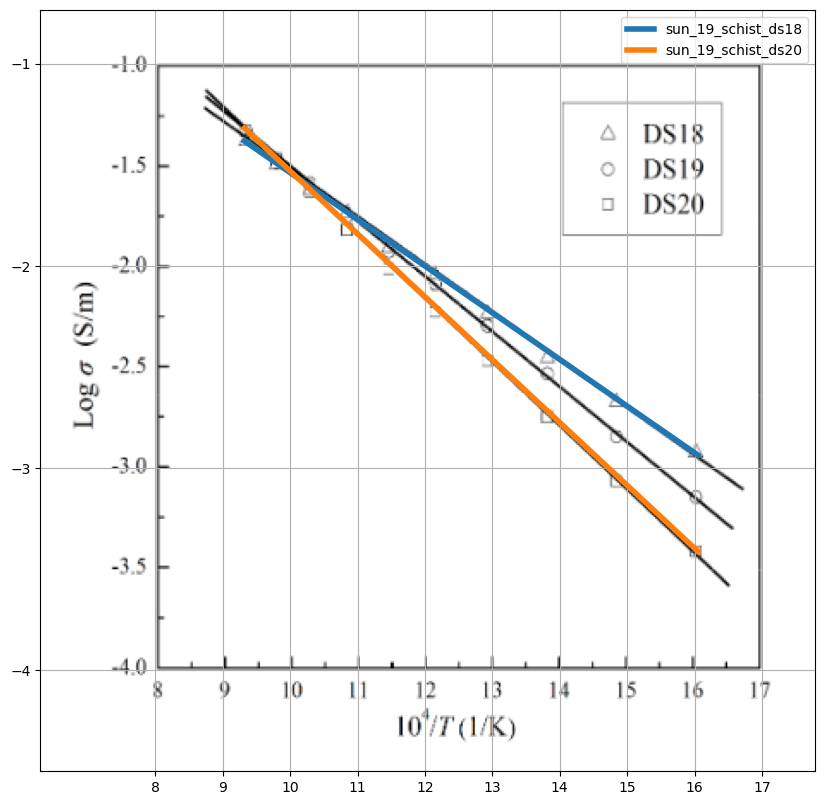

In [5]:
ec_model_row = ecdatabase.get_model_properties('sun_19_schist_ds18')

pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(400,1400,num=100,dtype=float).ravel()
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in ecdatabase.get_model_list_for_phase('schist'):
        ec_model_row = ecdatabase.get_model_properties(model)

        temperature_range=np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
        c1 = ecdatabase.get_model(model).get_conductivity(T=temperature_range)
        ax.plot(1e4/temperature_range,np.log10(c1),label=model,linewidth=4)
plt.legend()    
        
    
    


## Sun Water Contents

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.36
0.73


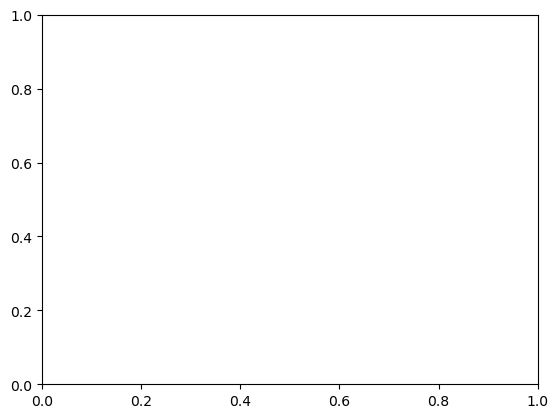

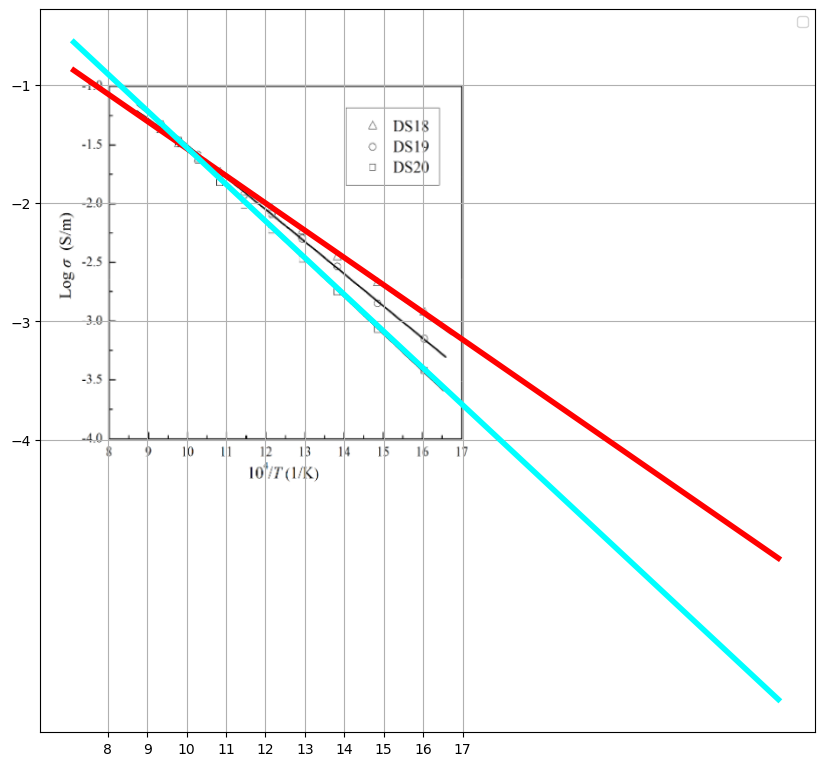

In [11]:
ec_model_row = ecdatabase.get_model_properties('sun_19_schist_ds18')
ax=plt.subplot()
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(400,1400,num=100,dtype=float).ravel()
for i, (png, ext, asp, xt, yt) in enumerate(zip(pngs,extents,aspects,xticks,yticks)):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for model in ecdatabase.get_model_list_for_phase('schist'):
        ec_model_row = ecdatabase.get_model_properties(model)
        water = ec_model_row['water_average'].astype(float).values[0]
        print(water)
        if water==0.36:
            color='red'
        elif water==0.73:
            color='cyan'
        c1 = ecdatabase.get_model(model).get_conductivity(T=temperature_range)
        ax.plot(1e4/temperature_range,np.log10(c1),linewidth=4,color=color)
plt.legend()    
        
    
    